In [4]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd

In [5]:
boston = load_boston()

In [8]:
boston_df = pd.DataFrame(data= boston.data, columns = boston.feature_names)
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
boston_df ['PRICE'] = boston.target

In [11]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [22]:
from pycaret.regression import *
exp1 = setup(boston_df, "PRICE")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4198
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# compare models

In [23]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.138100,8.902900,2.851600,0.890500,0.129700,0.105700
1,CatBoost Regressor,1.986000,8.996200,2.912800,0.887800,0.128800,0.098500
2,Extra Trees Regressor,2.036200,9.155700,2.901400,0.884700,0.127400,0.100700
3,Extreme Gradient Boosting,2.238500,10.429500,3.087100,0.871400,0.137300,0.109800
4,Random Forest,2.261200,10.313400,3.103900,0.870000,0.143900,0.115600
5,Light Gradient Boosting Machine,2.367500,11.943300,3.365400,0.850800,0.154400,0.119800
6,AdaBoost Regressor,2.951100,15.807900,3.890500,0.798800,0.178400,0.152500
7,Decision Tree,2.981400,18.945700,4.174700,0.769100,0.192400,0.150000
8,Least Angle Regression,3.413600,25.047800,4.816800,0.699200,0.248500,0.170100
9,Linear Regression,3.409800,25.152400,4.825500,0.698100,0.247700,0.169600


# Create Model

In [24]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7380,7.9575,2.8209,0.9173,0.1048,0.0774
1,1.2575,2.8733,1.6951,0.9536,0.0966,0.0727
2,3.0161,20.2327,4.4981,0.7807,0.1924,0.1492
3,2.1307,8.7744,2.9622,0.9127,0.1428,0.1075
4,2.0200,8.3119,2.8830,0.9172,0.1070,0.0873
5,2.2019,8.9842,2.9974,0.8980,0.1550,0.1226
6,1.5699,7.7990,2.7927,0.9011,0.1084,0.0709
7,1.9592,9.1801,3.0299,0.8090,0.1700,0.1160
8,1.7024,4.0678,2.0169,0.9389,0.0851,0.0773
9,2.2643,11.7808,3.4323,0.8495,0.1261,0.1038


# Tune it

In [25]:
tuned_cb = tune_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6089,5.6995,2.3874,0.9407,0.0901,0.0705
1,1.1878,2.7311,1.6526,0.9559,0.0991,0.0720
2,2.7988,14.5768,3.8180,0.8420,0.1976,0.1525
3,1.8276,6.5032,2.5501,0.9353,0.1296,0.0941
4,2.0665,9.1907,3.0316,0.9084,0.1046,0.0848
5,2.3009,10.6505,3.2635,0.8791,0.1591,0.1266
6,1.8795,11.8894,3.4481,0.8493,0.1270,0.0851
7,2.1322,9.5391,3.0885,0.8016,0.1716,0.1254
8,1.8489,5.0561,2.2486,0.9240,0.0980,0.0864
9,2.1787,9.6518,3.1067,0.8767,0.1152,0.0974


# SHAP Values (impact on model output)

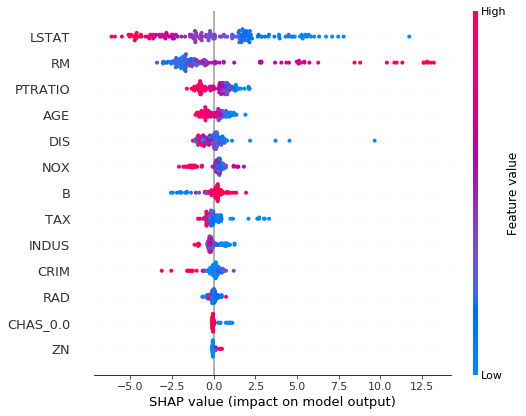

In [26]:
interpret_model(tuned_cb)